# Electronic Product Recommendation

In [1]:
# Reading Dataset
import numpy as np
import pandas as pd
import math

# Visualization
import plotly.express as px
import plotly.graph_objects as go  # Library for 3D plot visualization
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from wordcloud import WordCloud

### Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Model Training
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Import necessary modules
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Additional Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
user_data = pd.read_json('All_Beauty.json', lines=True)
product_data = pd.read_json('meta_All_Beauty.json', lines=True)

In [3]:
user_data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,5,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,5,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN


In [4]:
product_data.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


## Data Cleansing

In [5]:
# print shapes of DataFrames
print("user_data shape:", user_data.shape)
print("product_data shape:", product_data.shape)

user_data shape: (371345, 12)
product_data shape: (32892, 19)


In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371345 entries, 0 to 371344
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         371345 non-null  int64 
 1   verified        371345 non-null  bool  
 2   reviewTime      371345 non-null  object
 3   reviewerID      371345 non-null  object
 4   asin            371345 non-null  object
 5   reviewerName    371307 non-null  object
 6   reviewText      370946 non-null  object
 7   summary         371139 non-null  object
 8   unixReviewTime  371345 non-null  int64 
 9   vote            51899 non-null   object
 10  style           125958 non-null  object
 11  image           8391 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 31.5+ MB


In [7]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32892 entries, 0 to 32891
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         32892 non-null  object
 1   tech1            32892 non-null  object
 2   description      32892 non-null  object
 3   fit              32892 non-null  object
 4   title            32892 non-null  object
 5   also_buy         32892 non-null  object
 6   tech2            32892 non-null  object
 7   brand            32892 non-null  object
 8   feature          32892 non-null  object
 9   rank             32892 non-null  object
 10  also_view        32892 non-null  object
 11  details          32892 non-null  object
 12  main_cat         32892 non-null  object
 13  similar_item     32892 non-null  object
 14  date             32892 non-null  object
 15  price            32892 non-null  object
 16  asin             32892 non-null  object
 17  imageURL         32892 non-null

In [8]:
# drop unnecessary columns in user_data
user_data = user_data[['overall', 'reviewerID', 'asin', 'unixReviewTime']]

# rename columns in user_data
user_data = user_data.rename(columns={'overall': 'rating', 'reviewerID': 'userID', 'asin': 'productID', 'unixReviewTime': 'timestamp'})

# display DataFrame
user_data.head()

,rating,userID,productID,timestamp
0,1,A1V6B6TNIC10QE,0143026860,1424304000
1,4,A2F5GHSXFQ0W6J,0143026860,1418860800
2,4,A1572GUYS7DGSR,0143026860,1407628800
3,5,A1PSGLFK1NSVO,0143026860,1362960000
4,5,A6IKXKZMTKGSC,0143026860,1324771200


In [9]:
user_data.dropna(inplace=True)

In [10]:
# drop unnecessary columns in product_data
product_data = product_data[['asin', 'title', 'description']]

# rename columns in product_data
product_data = product_data.rename(columns={'asin': 'productID'})

In [11]:
#change [] and empty value into NaN in productID column
product_data['productID'].replace('[]', np.nan, inplace=True)
product_data['productID'].replace('', np.nan, inplace=True)

#change [] and empty value into NaN in title column
product_data['title'].replace('[]', np.nan, inplace=True)
product_data['title'].replace('', np.nan, inplace=True)

product_data.isnull().sum()

productID      0
title          1
description    0
dtype: int64

In [12]:
# Final shape of product_data and user_data
print("user_data shape:", user_data.shape)
print("product_data shape:", product_data.shape)

user_data shape: (371345, 4)
product_data shape: (32892, 3)


## Data Preprocessing

In [13]:
# Scaling our "rating" column in user_data
scaler = MinMaxScaler()
user_data['scaled_rating'] = scaler.fit_transform(user_data[['rating']])

## Encoding user IDs
user_encoder = LabelEncoder()
user_data["user_encoded"] = user_encoder.fit_transform(user_data["userID"])
num_users = len(user_encoder.classes_)

## Encoding product IDs
product_encoder = LabelEncoder()
user_data["product_encoded"] = product_encoder.fit_transform(user_data["productID"])
num_products = len(product_encoder.classes_)

In [14]:
# split data into train and test set (X, y)
X = user_data[["user_encoded", "product_encoded"]].values
y = user_data["scaled_rating"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# print the shape of the training and testing sets add some text
print('Shape of training sets: ', X_train.shape, y_train.shape)
print('Shape of testing sets: ', X_test.shape, y_test.shape)

Shape of training sets:  (297076, 2) (297076,)
Shape of testing sets:  (74269, 2) (74269,)


In [16]:
# Prepare input data for model training and evaluation
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

## Model Building


In [17]:
def build_model():
    # define input layers for user and product IDs
    user_input = Input(shape=(1,), name='user_input')
    product_input = Input(shape=(1,), name='product_input')

    # create embedding layers for user and product IDs
    user_embedding = Embedding(num_users, 5, name='user_embedding')(user_input)
    product_embedding = Embedding(num_products, 5, name='product_embedding')(product_input)

    # create bias terms for user and product embeddings
    user_bias = Embedding(num_users, 1, name='user_bias')(user_input)
    product_bias = Embedding(num_products, 1, name='product_bias')(product_input)

    # compute dot product of user and product embeddings
    x = Dot(axes=1)([user_embedding, product_embedding])
    x = Flatten()(x)

    # add dense layers for non-linear transformations
    x = Dense(128, activation='relu')(x)
    x = Dense(1)(x)

    # add bias terms to final output
    x = tf.keras.layers.add([x, user_bias, product_bias])

    # define model inputs and outputs
    model = Model(inputs=[user_input, product_input], outputs=x)

    # compile model with mean squared error loss and Adam optimizer
    model.compile(loss='mse', metrics=['mae', 'mse'], optimizer='adam')

    return model

model = build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 product_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 5)         1620190     ['user_input[0][0]']             
                                                                                                  
 product_embedding (Embedding)  (None, 1, 5)         162930      ['product_input[0][0]']          
                                                                                              

## Model Training


In [18]:
from tensorflow import keras
from tensorflow.keras.callbacks import Callback
K = keras.backend

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        # initialize OneCycleScheduler object with specified parameters
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
        
    def _interpolate(self, iter1, iter2, rate1, rate2):
        # interpolate learning rate between two iterations
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    
    def on_batch_begin(self, batch, logs):
        # update learning rate at beginning of each batch
        if self.iteration < self.half_iteration:
            # increase learning rate from start_rate to max_rate
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            # decrease learning rate from max_rate to start_rate
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            # decrease learning rate from start_rate to last_rate
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        # set learning rate for optimizer
        K.set_value(self.model.optimizer.lr, rate)

class LRLog(Callback):
    def __init__(self, verbose=0):
        # initialize LRLog object with specified parameters
        self.verbose = verbose
        self.lr_history = []
        
    def __len__(self):
        # return length of learning rate history
        return len(self.lr_history)
    
    def on_batch_end(self, batch, logs=None):
        # log the learning rate for current batch
        rate = K.get_value(self.model.optimizer.lr)
        self.lr_history.append(rate)
        
    def on_epoch_begin(self, epoch, logs=None):
        # print current learning rate at beginning of each epoch
        if self.verbose:
            lr = K.get_value(self.model.optimizer.lr)
            print(f"Current learning rate: {lr:.2e}")

In [19]:
# Define the minimum and maximum learning rates, batch size, and number of epochs
MIN_LR = 1e-5
MAX_LR = 5e-4
BS = 10000
EPOCHS = 30

# Create a callback that saves the model's weights
checkpoint_path = "beauty_recommendation.h5"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

# Create a callback that stops the training when the validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               mode='min')

# Define the number of epochs for ramp-up, sustain, and exponential decay
start_lr = 1e-5
rampup_epochs = 5
sustain_epochs = 0
exp_decay = 0.8

# Define a learning rate function that changes the learning rate over time
def lrfn(epoch):
    if epoch < rampup_epochs:
        # linearly increase learning rate from start_lr to max_lr during ramp-up period
        return (MAX_LR - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        # keep learning rate at max_lr during sustain period
        return MAX_LR
    else:
        # exponentially decrease learning rate from max_lr to min_lr during decay period
        return (MAX_LR - MIN_LR) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + MIN_LR

# Create a LearningRateScheduler object with the defined learning rate function
lr_callback = LearningRateScheduler(lrfn, verbose=0)

# Calculate the number of iterations
iterations = math.ceil(len(X_train) / BS) * EPOCHS

# Create a OneCycleScheduler object with the given parameters
onecycle_lr = OneCycleScheduler(iterations, start_rate=MIN_LR, max_rate=MAX_LR)

# Create a LRLog object with verbose mode on
lr_log_cb = LRLog(verbose=1)

# Define the callbacks to be used during training
callbacks = [checkpoint, 
             early_stopping,   
             lr_callback, 
             onecycle_lr, 
             lr_log_cb]

In [20]:
# Train the model with the given parameters
history = model.fit(x=X_train_array, 
                    y=y_train, 
                    batch_size=BS, 
                    epochs=EPOCHS, 
                    verbose=1, 
                    callbacks=callbacks, 
                    validation_data=(X_test_array, y_test))

Current learning rate: 1.00e-05
Epoch 1/30
30/30 [==============================] - ETA: 0s - loss: 0.7160 - mae: 0.7776 - mse: 0.7160
Epoch 1: val_loss improved from inf to 0.70773, saving model to beauty_recommendation.h5
30/30 [==============================] - 24s 745ms/step - loss: 0.7160 - mae: 0.7776 - mse: 0.7160 - val_loss: 0.7077 - val_mae: 0.7725 - val_mse: 0.7077 - lr: 4.5173e-05
Current learning rate: 1.08e-04
Epoch 2/30
30/30 [==============================] - ETA: 0s - loss: 0.6947 - mae: 0.7656 - mse: 0.6947
Epoch 2: val_loss improved from 0.70773 to 0.67712, saving model to beauty_recommendation.h5
30/30 [==============================] - 21s 691ms/step - loss: 0.6947 - mae: 0.7656 - mse: 0.6947 - val_loss: 0.6771 - val_mae: 0.7552 - val_mse: 0.6771 - lr: 8.1559e-05
Current learning rate: 2.06e-04
Epoch 3/30
30/30 [==============================] - ETA: 0s - loss: 0.6554 - mae: 0.7435 - mse: 0.6554
Epoch 3: val_loss improved from 0.67712 to 0.62952, saving model to bea

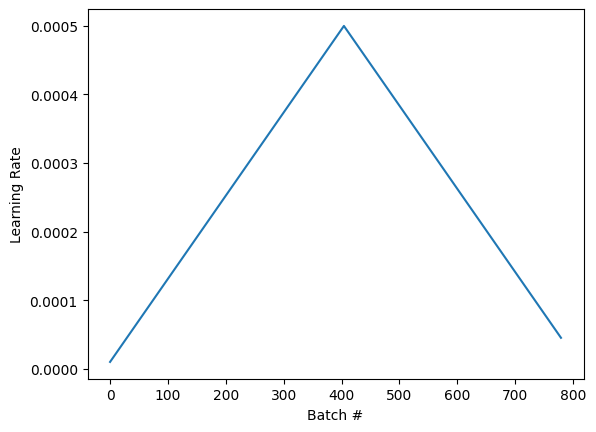

In [21]:
# showing the learning rate over time
plt.plot(lr_log_cb.lr_history)
plt.xlabel('Batch #')
plt.ylabel('Learning Rate')
plt.show()

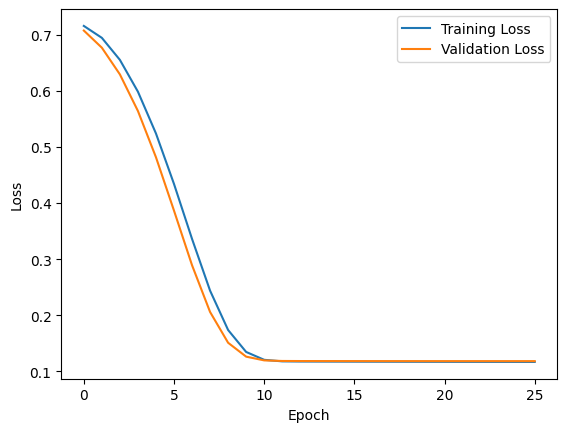

In [22]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Generating Recommendation

In [23]:
import tensorflow as tf

def load_trained_model(model_path):
    # Load the saved model
    model = tf.keras.models.load_model(model_path)

    # Compile the model with specified loss function, optimizer, and metrics
    model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

    return model

In [24]:
# Load the trained model
model = load_trained_model('beauty_recommendation.h5')

In [25]:
import numpy as np
import tensorflow as tf

def extract_weights(name, model):
    # Get the layer by name from the model
    weight_layer = None
    for layer in model.layers:
        if layer.name == name:
            weight_layer = layer
            break
    
    if weight_layer is None:
        raise ValueError(f"No such layer: {name}. Existing layers are: {[layer.name for layer in model.layers]}")
    
    # Get the weights from the layer
    weights = weight_layer.get_weights()[0]
    
    # Normalize the weights
    weights = weights / np.linalg.norm(weights, axis=1).reshape((-1, 1))
    
    return weights

# Load the trained model
model = tf.keras.models.load_model('beauty_recommendation.h5')

try:
    # Extract weights for product embeddings
    product_weights = extract_weights('product_embedding', model)
    # Extract weights for user embeddings
    user_weights = extract_weights('user_embedding', model)
except ValueError as e:
    print(e)

In [26]:
product_weights.shape, user_weights.shape

((32586, 5), (324038, 5))

In [27]:
def find_similar_product(title, n=5, return_dist=False, neg=False):
    try:
        # Get the row for the product with the given title
        product_row = product_data[product_data['title'] == title].iloc[0]
        index = product_row['productID']
        encoded_index = product_encoder.transform([index])[0]
        weights = product_weights
        
        # Calculate the cosine similarity between the given product and all other products
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        # Get the n most similar products
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Products closest to {}'.format(title))

        # Return the n most similar products as a DataFrame
        if return_dist:
            return dists, closest
        
        SimilarityArr = []

        for close in closest:
            # Get the title and description for each of the n most similar products
            decoded_id = product_encoder.inverse_transform([close])[0]
            product_frame = product_data[product_data['productID'] == decoded_id]
            
            product_title = product_frame['title'].values[0]
            description = product_frame['description'].values[0]
            similarity = dists[close]
            
            # Append the product information to the SimilarityArr list
            SimilarityArr.append({"Title": product_title, "Similarity": similarity, "Description": description})

        # Convert the SimilarityArr list to a DataFrame and sort by similarity
        Frame = pd.DataFrame(SimilarityArr).sort_values(by="Similarity", ascending=False)
        
        # Return the n most similar products as a DataFrame, excluding the input product
        return Frame[Frame.Title != title]

    except:
        print('{} not found in product list'.format(title))

In [28]:
find_similar_product('Wella Koleston Perfect Hair Colour 44/44 Medium Intense Red Brown 60ml', n=5)

Products closest to Wella Koleston Perfect Hair Colour 44/44 Medium Intense Red Brown 60ml


,Title,Similarity,Description
4,iColor Ocean Blue - One Pair,0.992235,[Transform your eyes into a beautiful Ocean Bl...
3,Natural Amla-ritha-shikakai Powder (100gm),0.991132,[]
2,Unnecto Air 4.5 Senior Phone NEW Cell Phone Ca...,0.990355,[]
1,Jabot 3 pcs Gift Bag: Included One Glow Ever A...,0.989377,[]
0,"Clairol Balsam Medium Ash Brown Hair Color, Pa...",0.989083,[]


In [29]:
# Get a random title from the product_data DataFrame
random_title = product_data.sample(1)['title'].values[0]

# Find similar products for the random title
find_similar_product(random_title, n=10)

Products closest to Jordana Sweet Cream Matte Liquid Lip Color 08 Sweet Marsala Wine


,Title,Similarity,Description
9,"Lumene Bright Touch Refreshing Cleansing Foam,...",0.995759,[]
8,USHER by Usher CANDLE 2.4 OZ,0.990084,"[USHER by Usher CANDLE 2.4 OZ ""Pink Freesia, R..."
7,ZipperStop Wholesale - Zipper Repair Kit Solut...,0.985073,[YKK Zipper Bottom Stoppers]
6,Ayygiftideas 6-in-1 Unisex Fleece Neck Warmers...,0.981081,[Classic style women's/men's CS mask .It made ...
5,"TLT Portable Toiletry Bag Applies to business,...",0.980195,[]
4,CJ Industries F-1 6 Pack Fantastic Ice Scraper...,0.979986,[]
3,"Dr. CHRISTOPHER'S, Ointment Nose - 2 oz",0.978020,"[Nose Ointment 2 oz BalmProduct Description, A..."
2,"Blue by Ralph Lauren for Women, Shower Gel, 6....",0.977190,[Introduced in 2003. Fragrance notes: soft flo...
1,Clear Crystal Screw Nose Ring 20 Gauge 316l Su...,0.975727,[Clear Crystal Screw Nose Ring 20 Gauge 316l S...
0,NYX Slide On Pencil Waterproof Extreme Shine E...,0.975718,[NYX Slide On Pencil Waterproof Extreme Shine ...
